# Gradient descent

In [ ]:
# We calculate weights and bias of after every iteration of all training samples and adjust it after every
# epoch. Every epoch results in giving us weights and bias which helps us to find error (y_pred - y_true)
# After calculating error after each iteration, we find mean-squared-error of it also known cost function
# We need to mininmize it which is achieved by continuous adjustment of weights.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('C://users//sameer//desktop//datasets//homeprices.csv')
data

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [4]:
# Scaling of data
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

In [5]:
x = data.drop('price', axis = 1)
y = data[['price']]
scaled_x = sx.fit_transform(x)
scaled_y = sy.fit_transform(y)

In [6]:
scaled_x

array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [7]:
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [8]:
def gradient_descent(x,y_true,epochs):
    learning_rate = 0.01
    w = np.ones(shape=(np.shape(x[1]))) # number of features = x.shape[1]
    b = 0
    total_samples = len(x)
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,x.T) + b # w1 * x1 + w2 * x2 + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.mean(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0: # Collecting every 10th epoch and cost values
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [9]:
w,b,cost,cost_list,epoch_list = gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.42279092, 0.76898696, 0.2144316 ]),
 -0.19526410851189863,
 0.015186199474095607)

In [10]:
# Visualizing gradient descent
import matplotlib.pyplot as plt
%matplotlib inline

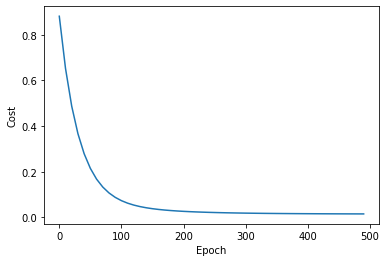

In [11]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list,cost_list)
# Graph and descent is smoother

In [12]:
# predicting prices
def predict(area,bedrooms,age,w,b):
    scaled_x = sx.transform([[area,bedrooms,age]])[0] # MinMax takes a dataframe or 2D array
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + w[2] * scaled_x[2] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,3,20,w,b)

529641.6319924617

# Stochastic Gradient Descent

In [13]:
# In dataset which has very large number of rows as well as high number of features, calculating Gradient
# descent for every epoch is very time consuming and requires high computation, therefore SGD is used
# In SGD we randomly a data-point and adjust weights and bias after every sample instead of a full epoch
# Helps in speeding up the computation

In [14]:
import random

In [15]:
def stochastic_gradient_descent(x,y_true,epochs):
    learning_rate = 0.01
    w = np.ones(shape = np.shape(x[1]))
    b = 0
    total_samples = len(x)
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [16]:
w_sgd ,b_sgd ,cost_sgd ,cost_list_sgd ,epoch_list_sgd  = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.45724697, 0.78673426, 0.22303247]),
 -0.2240100420185467,
 0.029337640590848105)

In [17]:
def predict(area,bedrooms,age,w_sgd,b_sgd):
    scaled_x = sx.transform([[area,bedrooms,age]])[0] # MinMax takes a dataframe or 2D array
    scaled_price = w_sgd[0] * scaled_x[0] + w_sgd[1] * scaled_x[1] + w_sgd[2] * scaled_x[2] + b_sgd
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,3,20,w_sgd,b_sgd)

523387.44905702706

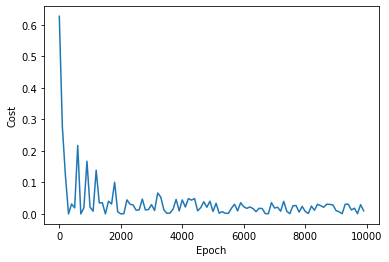

In [18]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd,cost_list_sgd)
# Gradient descent is rough

# Mini Batch Gradient Descent

In [30]:
# In mini batch GD a sample number of data points and update weights and bias according to it instead of
# updating at a full round of epoch or at a random data point

In [22]:
def mini_batch_gradient_descent(x,y_true,epochs):
    learning_rate = 0.01
    w = np.ones(shape = np.shape(x[1]))
    b = 0
    total_samples = len(x)
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        for j in range(3):
            x_n = x[j]
            y_n = y_true[j]

            y_predicted = np.dot(w,x_n.T) + b

            w_grad = -(2/total_samples)*(x_n.T.dot(y_n - y_predicted))
            b_grad = -(2/total_samples)*np.mean(y_n - y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(y_n - y_predicted))

            if i % 100 == 0:
                cost_list.append(cost)
                epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

In [27]:
w_mb ,b_mb ,cost_mb ,cost_list_mb ,epoch_list_mb  = mini_batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_mb, b_mb, cost_mb

(array([0.81844321, 0.75670174, 0.8637736 ]),
 -0.548420476576408,
 0.0035353630475076113)

In [28]:
def predict(area,bedrooms,age,w_mb,b_mb):
    scaled_x = sx.transform([[area,bedrooms,age]])[0] # MinMax takes a dataframe or 2D array
    scaled_price = w_mb[0] * scaled_x[0] + w_mb[1] * scaled_x[1] + w_mb[2] * scaled_x[2] + b_mb
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,3,20,w_mb,b_mb)

529909.4770436138

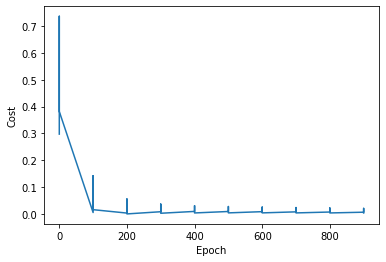

In [29]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list_mb,cost_list_mb)

In [31]:
li = [[w,b,cost],[w_sgd,b_sgd,cost_sgd],[w_mb,b_mb,cost_mb]]
li

[[array([0.42279092, 0.76898696, 0.2144316 ]),
  -0.19526410851189863,
  0.015186199474095607],
 [array([0.45724697, 0.78673426, 0.22303247]),
  -0.2240100420185467,
  0.029337640590848105],
 [array([0.81844321, 0.75670174, 0.8637736 ]),
  -0.548420476576408,
  0.0035353630475076113]]